# Case Study on Correlation and Regression

A textile company regularly spent money on five advertising companies for their
ads. (Dataset added along with)
1. First of all, check whether there is any relationship between the amount
spent for advertising through five different companies and profit
generated.
2. Build a regression model to predict the profit from the given data and
comment your findings on it.
3. Predict the profit generated by the company, if they wish to spend the
following amount for advertisement:

 Add1(in Thousands) 290 Add2(in Thousands) 312 Add3(in Thousands) 309 Add4(in Thousands) 298 Add5(in Thousands) 320

# Objective:

To build a regression model to predict the profit from the given dataset. 

### Importing relevant libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Reading the dataset:

In [42]:
data = pd.read_csv("Add_sales_data_2018.csv")

In [43]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


### The shape of the dataset:¶ 

In [44]:
data.shape

(205, 7)

### Checking for null values if any: 

In [45]:
data.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

### Checking the datatypes: 

In [46]:
data.dtypes

Date                     object
Add1(in Thousands)      float64
Add2(in Thousands)      float64
Add3(in Thousands)      float64
Add4(in Thousands)      float64
Add5(in Thousands)      float64
Profit(in Thousands)    float64
dtype: object

In [47]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

## 1. Relationship between the amount spent for advertising through five different companies and profit generated.


In [48]:
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


### Plotting the data of amount spent on each advertising company individually:

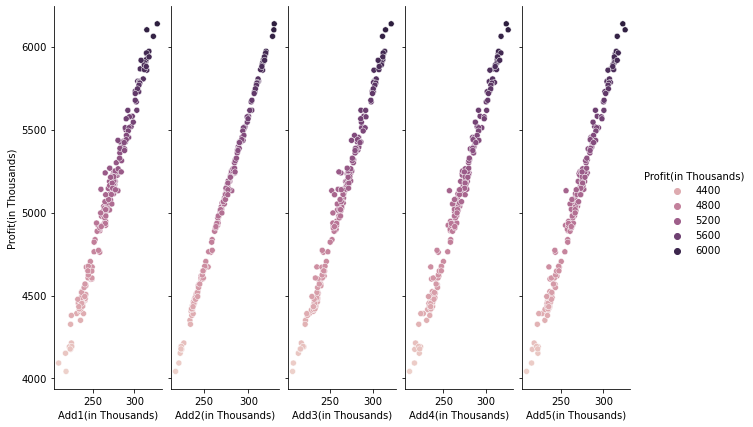

In [49]:
sns.pairplot(data, x_vars=['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)',
                           'Add5(in Thousands)'],y_vars='Profit(in Thousands)',height=6, aspect=0.3,
             hue="Profit(in Thousands)")


## Insight:

* From this plot we come to an inference that the profit(in Thousands) is maintaining a high positive correlation with the amount spent on the advertising companies, that means the profit is directly propotional to the amount spent on the advertising companies. 

### Lets sum up the amount spent on all advertising companies and see the impact on profit:

In [50]:
data_copy = data.copy(deep=True)

In [51]:
data_copy['Total_add_spent'] = data_copy['Add1(in Thousands)'] + data_copy['Add2(in Thousands)'] + data_copy['Add3(in Thousands)'] + data_copy['Add4(in Thousands)'] + data_copy['Add5(in Thousands)']

In [66]:
data_copy

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands),Total_add_spent
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065,1068.25
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448,1060.95
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819,1102.90
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665,1147.30
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683,1151.40
...,...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105,1424.25
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655,1433.95
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013,1459.10
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444,1471.65


* Plotting the data:  

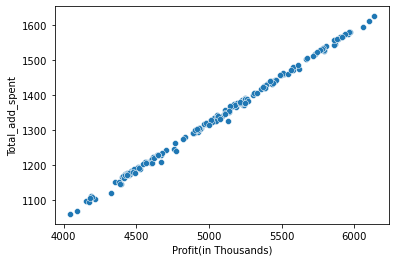

In [53]:
sns.scatterplot(x=data_copy['Profit(in Thousands)'],y=data_copy['Total_add_spent'])
plt.show()

In [54]:
corr_matrix = data_copy[['Profit(in Thousands)', 'Total_add_spent']].corr()

In [55]:
corr_matrix

,Profit(in Thousands),Total_add_spent
Profit(in Thousands),1.000000,0.999054
Total_add_spent,0.999054,1.000000


## Insight:

* It is observed that the profit(in Thousands) is maintaining a high positive correlation (nearly 1) with the amount spent on each advertising companies.
* A change in the total add spent will reflect a change on Profit(in Thousands).

## 2. Regression model to predict the profit from the given data:

X = data.drop(['Date', 'Profit(in Thousands)'], axis = 1)
y = data['Profit(in Thousands)']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [59]:
X_test

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
15,216.35,223.70,212.65,221.65,222.65
9,233.55,239.20,230.75,234.00,233.30
100,280.00,281.35,251.85,257.00,255.90
132,258.05,263.50,253.70,263.45,262.20
68,265.10,268.40,261.20,263.15,265.60
95,244.10,248.35,240.55,244.00,243.55
159,287.95,289.00,280.90,281.50,281.95
162,282.00,286.50,276.10,280.40,280.45
147,274.80,276.95,270.55,276.60,275.65
182,315.00,319.10,312.55,314.25,314.10


### Predictions: 

In [60]:
predictions = model.predict(X_test)
predictions

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282, 4623.793,
       5384.175, 5328.025, 5175.051, 5956.323, 5780.799, 4997.719,
       5075.858, 5784.54 , 4936.12 , 5065.652, 4190.965, 5034.726,
       5015.536, 5134.657, 5145.131, 5421.94 , 4569.293, 4598.292,
       4436.321, 4175.677, 5616.791, 5667.25 , 4648.834, 5717.838,
       5001.615, 5182.368, 5017.503, 5545.013, 5013.207, 5030.451,
       5108.626, 4760.877, 4606.34 , 4925.861, 5250.788])

## Insight:

In [ ]:
As the mean squared error is a very minimal, the predicted values stands similar to the data. 

### Mean Squared Error:

In [61]:
mse_value = mean_squared_error(y_test, predictions)
mse_value

3.429773271561334e-25

## 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement:
Add1(in Thousands) 290 Add2(in Thousands) 312 Add3(in Thousands) 309 Add4(in Thousands) 298 Add5(in Thousands) 320

In [62]:
predictions_2 = model.predict([[290, 312, 309, 298, 320]])
predictions_2

array([5820.06])

## Insight:

* 5820.06 is the predicted profit(in Thousands) if they wish to spend the amounts 290,312,309,298,320 in each advertising companies.